In [17]:
import random
import numpy
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.optimize as optimize
from decimal import Decimal

## 1. One dimensional methods

### Defining the methods

#### Exhaustive Search

In [159]:
def min_exhaustive_search(fun,a,b,error):
    n=round((b-a)/error)
    min_fun=100000
    min_x=0
    for k in range (n+1):
        x= a + k * (b-a)/n
        fun_x=fun(x)
        if (fun_x < min_fun): #searching for the minimum value of function
            min_x=x
            min_fun=fun_x
    return min_x, abs(min_x-error),min_x +error, min_fun ,n
    '''returning :
    -value of x that yeilds min value of function 
    -minimum possible value of x that yeilds min value of function according to the accepted error 
    -maximum possible value of x that yeilds min value of function according to the accepted error 
    - the minimum found value of th fuction
    - num of iteration = num of function calculations'''
# num of f calculations = number of iteratioins = n

#### Dichotomy

In [57]:
# delta most be declared before calling the function. delta = random.uniform(0, error)
def min_dichotomy (fun,a,b,error,delta,num_iter,num_fun):
    num_iter+=1     #calculate the number of iterations
    if (abs(a-b)<error):
        return a,b,num_fun,num_iter
    else:
        x1= ((a+b-delta)/2)
        x2=((a+b+delta)/2)
        num_fun+=1           #calculate the number of function calculations
        if(fun(x1)<fun(x2)):
            b=x2
        else:
            a=x1
        return min_dichotomy (fun,a,b,error,delta,num_fun,num_iter)

# to call this function min_dichotomy(fun,a,b,error,delta,0,0)

#### Golden section search

In [65]:
def min_golden (fun,a,b,error,x1,x2,fun_value,label,num_iter,num_fun):
    num_iter+=1                         #saving the number of total iteration of the function min_golden
    if (abs(b-a)<error):
        result=[a,b,num_fun,num_iter]
        return result
    else:
        if (label=='both'):   # this case will be true when first call the function, then in next stages will be either of the two following (elif)
            x1= (a+((3-math.sqrt(5))/2)*(b-a))
            x2=(b+((math.sqrt(5)-3)/2)*(b-a))
            fun_x1=fun(x1)
            fun_x2=fun(x2)
            num_fun+=2                  #saving the number of calculating of the function
        elif (label=='right'):  # this case will be true when we are moving our calculations to the right
            x2=(b+((math.sqrt(5)-3)/2)*(b-a))
            fun_x1=fun_value
            fun_x2=fun(x2)
            num_fun+=1                  #saving the number of calculating of the function
        elif (label=='left'):    # this case will be true when we are moving our calculations to the left
            x1= (a+((3-math.sqrt(5))/2)*(b-a))
            fun_x1=fun(x1)
            fun_x2=fun_value
            num_fun+=1                  #saving the number of calculating of the function
        #After calculating x1,x2,fun_x1,fun_x2 in previous lines, 
        # next according to the condition we will decide to recall the function to the right or left range.
        if(fun_x1<fun_x2):
            b=x1
            x2=x1
            return min_golden (fun,a,b,error,x1,x2,fun_x1,'left',num_iter,num_fun)
        else:
            a=x1
            x1=x2
            return min_golden (fun,a,b,error,x1,x2,fun_x2,'right',num_iter,num_fun)
# to call this function min_golden(fun,a,b,error,0,0,0,'both',0,0)


### Defining the functions

In [59]:
def cube_power(x):
    return pow(x,3)

In [17]:
def abs_function(x):
    return (abs(x-0.2)) 

In [18]:
def sin_function(x):
    return(x*math.sin(1/x))

### Applying the methods for the functions

In [61]:
#First function
min_x, a,b, min_fun ,n =min_exhaustive_search(cube_power,0,1,0.001) # applying first method
parameters=[]
parameters.append([a,b, n ,n])                                   # saving the result from the first method
delta = random.uniform(0, 0.001)                                    #declaring delta to be used in second method
parameters.append(min_dichotomy(cube_power,0,1,0.001,delta,0,0))    #applying 2nd method and saving the result
parameters.append(min_golden(cube_power,0,1,0.001,0,0,0,'both',0,0)) #applying the third method and saving the results
# Printing a table with results
rowIDs=['Exhaustive','Dichotomy','Golden section']
print(tabulate(parameters, headers=['a','b','function claculation','num of iteration'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))

╒════════════════╤═══════╤═════════════╤════════════════════════╤════════════════════╕
│                │   a   │      b      │  function claculation  │  num of iteration  │
╞════════════════╪═══════╪═════════════╪════════════════════════╪════════════════════╡
│ Exhaustive     │ 0.001 │    0.001    │          1000          │        1000        │
├────────────────┼───────┼─────────────┼────────────────────────┼────────────────────┤
│ Dichotomy      │   0   │ 0.000866204 │           13           │         12         │
├────────────────┼───────┼─────────────┼────────────────────────┼────────────────────┤
│ Golden section │   0   │ 0.000453104 │           9            │         9          │
╘════════════════╧═══════╧═════════════╧════════════════════════╧════════════════════╛


In [ ]:
parameters_linear=[]               # defining array to save the results

In [62]:
#Second function
min_x, a,b, min_fun ,n =min_exhaustive_search(abs_function,0,1,0.001) # applying first method
parameters_2=[]
parameters_2.append([a,b, n ,n])                                   # saving the result from the first method
delta = random.uniform(0, 0.001)                                    #declaring delta to be used in second method
parameters_2.append(min_dichotomy(abs_function,0,1,0.001,delta,0,0))    #applying 2nd method and saving the result
parameters_2.append(min_golden(abs_function,0,1,0.001,0,0,0,'both',0,0)) #applying the third method and saving the results
# Printing a table with results
rowIDs=['Exhaustive','Dichotomy','Golden section']
print(tabulate(parameters_2, headers=['a','b','function claculation','num of iteration'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))

╒════════════════╤══════════╤══════════╤════════════════════════╤════════════════════╕
│                │    a     │    b     │  function claculation  │  num of iteration  │
╞════════════════╪══════════╪══════════╪════════════════════════╪════════════════════╡
│ Exhaustive     │  0.199   │  0.201   │          1000          │        1000        │
├────────────────┼──────────┼──────────┼────────────────────────┼────────────────────┤
│ Dichotomy      │ 0.199651 │ 0.200419 │           12           │         11         │
├────────────────┼──────────┼──────────┼────────────────────────┼────────────────────┤
│ Golden section │ 0.145165 │ 0.145898 │           24           │         24         │
╘════════════════╧══════════╧══════════╧════════════════════════╧════════════════════╛


In [64]:
#third function
min_x, a,b, min_fun ,n =min_exhaustive_search(sin_function,0.01,1,0.001) # applying first method
parameters_3=[]
parameters_3.append([a,b, n ,n])                                   # saving the result from the first method
delta = random.uniform(0, 0.001)                                    #declaring delta to be used in second method
parameters_3.append(min_dichotomy(sin_function,0.01,1,0.001,delta,0,0))    #applying 2nd method and saving the result
parameters_3.append(min_golden(sin_function,0.01,1,0.001,0,0,0,'both',0,0)) #applying the third method and saving the results
# Printing a table with results
rowIDs=['Exhaustive','Dichotomy','Golden section']
print(tabulate(parameters_3, headers=['a','b','function claculation','num of iteration'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))

╒════════════════╤═══════════╤═══════════╤════════════════════════╤════════════════════╕
│                │     a     │     b     │  function claculation  │  num of iteration  │
╞════════════════╪═══════════╪═══════════╪════════════════════════╪════════════════════╡
│ Exhaustive     │   0.222   │   0.224   │          990           │        990         │
├────────────────┼───────────┼───────────┼────────────────────────┼────────────────────┤
│ Dichotomy      │ 0.222134  │  0.22298  │           12           │         11         │
├────────────────┼───────────┼───────────┼────────────────────────┼────────────────────┤
│ Golden section │ 0.0173235 │ 0.0180493 │           15           │         15         │
╘════════════════╧═══════════╧═══════════╧════════════════════════╧════════════════════╛


## 2. Multidimensional direct methods

### Initials

In [350]:
alpha = random.uniform(0, 1)    #random value
beta = random.uniform(0, 1)     #random value
size_of_array = 100
min_ab=0
max_ab=1
error =0.001
delta_normal=numpy.random.standard_normal(size=size_of_array)     #random samples samples from a standard Normal distribution (mean=0, stdev=1).   
x=[]   #Intializing the x vector
y=[]   #Intializing the y vector
y_clear =[] #Intializing the clear y vector
for k in range(size_of_array):    #According to the proposed formulas, calculating x and y
    x.append(k/100)
    y.append(alpha* x[k]+ beta+ delta_normal[k])
    y_clear.append(alpha* x[k]+ beta)
print(alpha,beta)
x=numpy.array(x)
y=numpy.array(y)
y_clear=numpy.array(y_clear)

0.18993010252312093 0.8681364223877658


### Implementation of the optimization methods

#### Multi Dimensional Exhaustive

In [351]:
def multi_exhaustive_search(fun,min,max,error):
    n=round((max-min)/error)
    min_fun=100000
    num_fun=0
    min_a=0
    min_b=0
    for k in range (n+1):
        a= min + k * (max-min)/n
        for j in range(n+1):
            b=min*j+(max-min)/n
            fun_x= fun([a,b])
            num_fun+=1
            if (fun_x < min_fun): #searching for the minimum value of function
                min_a=a
                min_b=b
                min_fun=fun_x
    return min_a,min_b, min_fun ,num_fun, n*n
    '''returning :
    -value of x that yeilds min value of function 
    -minimum possible value of x that yeilds min value of function according to the accepted error 
    -maximum possible value of x that yeilds min value of function according to the accepted error 
    - the minimum found value of th fuction
    - num of iteration = num of function calculations'''
# num of f calculations = number of iteratioins = n

#### min_dichtomy is edited to pass 2 parameters for the multidimensional function optimization
this function will be used at Gauss (coordinate descent) method to optomize the function for one variable at one iteration

In [352]:
# delta most be declared before calling the function. delta = random.uniform(0, error)
def min_dichotomy_multi (fun,a,b,error,delta,num_iter,num_fun,label,value):
    num_iter+=1     #calculate the number of iterations
    if (abs(a-b)<error):
        return a,b,num_fun,num_iter
    else:
        x1= ((a+b-delta)/2)
        x2=((a+b+delta)/2)
        num_fun+=1           #calculate the number of function calculations
        if(label==1):
            fun_x1= fun([x1,value])
            fun_x2= fun([x2,value])
        else:
            fun_x1= fun([value,x1])
            fun_x2= fun([value,x2])
        if(fun_x1<fun_x2):
            b=x2
        else:
            a=x1
        return min_dichotomy_multi (fun,a,b,error,delta,num_fun,num_iter,label,value)
# to call this function min_dichotomy(fun,a,b,error,delta,0,0,label,value)

#### Coordinat Gauss Method

In [353]:
def coordinateGauss (fun,a,b,x_1,x_2,error,num_iter,num_fun):
    if (num_iter%2==0):
        num_iter+=1
        delta = random.uniform(0, error)
        min,max,fun_cal,_=min_dichotomy_multi(fun,a,b,error,delta,0,0,1,x_2)
        num_fun+=fun_cal
        x_11=(max-min)/2
        if ((abs(x_11-x_1)<error) or (abs(fun([x_1,x_2])-fun([x_11,x_2]))<error)):
            return x_11, x_2, fun([x_11,x_2]),num_fun,num_iter
        else:
            return coordinateGauss(fun,a,b,x_11,x_2,error,num_iter,num_fun)
    else:
        num_iter+=1
        delta = random.uniform(0, error)
        min,max,fun_cal,_=min_dichotomy_multi(fun,a,b,error,delta,0,0,2,x_1)
        num_fun+=fun_cal
        x_21=(max-min)/2
        if  ( (abs(x_21-x_2)<error) or (abs(fun([x_1,x_2])-fun([x_1,x_21]))<error) ):
            return x_1, x_21, fun([x_1,x_21]),num_fun,num_iter
        else:
            return coordinateGauss(fun,a,b,x_1,x_21,error,num_iter,num_fun)
    


### Defining Mean Suquare Error for each approximation

In [354]:
# Mean Suare error with linear approximation
def mean_square_linear(params):
    a,b=params
    return numpy.sum(pow(numpy.add(a*x+b,-y),2))

In [355]:
# Mean Suare error with rational approximation
def mean_square_rational(params):
    a,b=params
    return numpy.sum(pow(numpy.add(a/(a+b*x),-y),2))

### Applying the three methods

#### linear

In [356]:
parameters_linear=[]               # defining array to save the results

In [357]:
# multi exhaustive_search
parameters_ES= multi_exhaustive_search(mean_square_linear,min_ab,max_ab,error)
parameters_linear.append([parameters_ES[0],parameters_ES[1],parameters_ES[2],parameters_ES[3],parameters_ES[4]])

In [358]:
# Coordinate Gauss
initial_guess =numpy.random.random_sample((2,))
parameters_CG=coordinateGauss (mean_square_linear,min_ab,max_ab,initial_guess[0],initial_guess[1],error,0,0)
parameters_linear.append([parameters_CG[0],parameters_CG[1],parameters_CG[2],parameters_CG[3],parameters_CG[4]])

In [385]:
# Nelder-Mead
initial_guess =numpy.random.random_sample((2,))
result_linear_NM = optimize.minimize(mean_square_rational, initial_guess,method='nelder-mead',options={'disp': True, 'xtol':error,'ftol':error})
parameters_linear.append([result_linear_NM.x[0],result_linear_NM.x[1],result_linear_NM.fun,result_linear_NM.nfev,result_linear_NM.nit])

Optimization terminated successfully.
         Current function value: 97.878605
         Iterations: 29
         Function evaluations: 54


In [360]:
parameters_linear[0].append(abs(alpha-parameters_linear[0][0]))
parameters_linear[0].append(abs(beta-parameters_linear[0][1]))
parameters_linear[1].append(abs(alpha-parameters_linear[1][0]))
parameters_linear[1].append(abs(beta-parameters_linear[1][1]))
parameters_linear[2].append(abs(alpha-parameters_linear[2][0]))
parameters_linear[2].append(abs(beta-parameters_linear[2][1]))

In [389]:
# Printing a table with results
rowIDs=['Exhaustive','Gauss ','Nelder-Mead']
print(tabulate(parameters_linear, headers=['a','b','function value','function claculation','num of iteration','precesion |a-alpha|','precesion |b-beta|'],numalign ='center',showindex=rowIDs))

                  a            b        function value    function claculation    num of iteration    precesion |a-alpha|    precesion |b-beta|
-----------  -----------  -----------  ----------------  ----------------------  ------------------  ---------------------  --------------------
Exhaustive        1          0.001         118.601              1002001               1000000               0.81007               0.867136
Gauss        0.000272658  0.000489607       186.78                 35                    3                 0.189657               0.867647
Nelder-Mead   0.823398    -0.0243091       97.8786                 54                    29                0.633468               0.892446


Text(0, 0.5, 'F(x,a,b)')

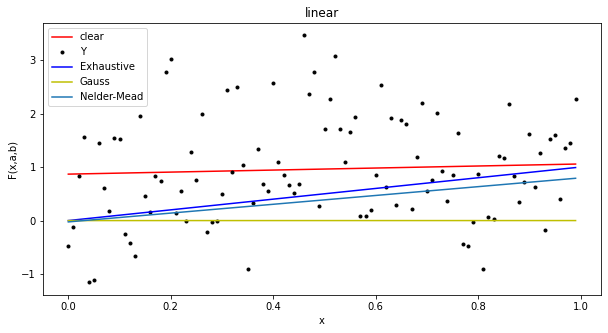

In [390]:
#x1 = numpy.linspace(1, min(x),max(x), endpoint=True)
y1 = parameters_linear[0][0] *x + parameters_linear[0][1]    
y2= parameters_linear[1][0] *x + parameters_linear[1][1] 
y3=parameters_linear[2][0] *x + parameters_linear[2][1] 
plt.figure(figsize=(10,5))
plt.title("linear")
plt.plot(x, y_clear, 'r-')
plt.plot(x, y, '.k')
plt.plot(x, y1, 'b-')
plt.plot(x, y2, 'y-')
plt.plot(x, y3, '-')
plt.legend(["clear","Y","Exhaustive", "Gauss","Nelder-Mead"])
plt.xlabel("x")
plt.ylabel("F(x,a,b)")

#### Rational

In [376]:
parameters_rational=[]               # defining array to save the results

In [377]:
# multi exhaustive_search
parameters_ESR= multi_exhaustive_search(mean_square_rational,min_ab,max_ab,error)
parameters_rational.append([parameters_ESR[0],parameters_ESR[1],parameters_ESR[2],parameters_ESR[3],parameters_ESR[4]])

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [378]:
# Coordinate Gauss
initial_guess =numpy.random.random_sample((2,))
parameters_CGR=coordinateGauss (mean_square_rational,min_ab,max_ab,initial_guess[0],initial_guess[1],error,0,0)
parameters_rational.append([parameters_CGR[0],parameters_CGR[1],parameters_CGR[2],parameters_CGR[3],parameters_CGR[4]])

In [379]:
# Nelder-Mead
initial_guess =numpy.random.random_sample((2,))
result_rational_NM = optimize.minimize(mean_square_rational, initial_guess,method='nelder-mead',options={'disp': True, 'xtol':error,'ftol':error})
parameters_rational.append([result_rational_NM.x[0],result_rational_NM.x[1],result_rational_NM.fun,result_rational_NM.nfev,result_rational_NM.nit])
result_rational_NM

Optimization terminated successfully.
         Current function value: 97.878605
         Iterations: 39
         Function evaluations: 71


 final_simplex: (array([[ 0.88496982, -0.02615879],
       [ 0.88424451, -0.02613774],
       [ 0.88585537, -0.02618591]]), array([97.8786047, 97.8786047, 97.8786047]))
           fun: 97.87860470132907
       message: 'Optimization terminated successfully.'
          nfev: 71
           nit: 39
        status: 0
       success: True
             x: array([ 0.88496982, -0.02615879])

In [380]:
parameters_rational[0].append(abs(alpha-parameters_rational[0][0]))
parameters_rational[0].append(abs(beta-parameters_rational[0][1]))
parameters_rational[1].append(abs(alpha-parameters_rational[1][0]))
parameters_rational[1].append(abs(beta-parameters_rational[1][1]))
parameters_rational[2].append(abs(alpha-parameters_rational[2][0]))
parameters_rational[2].append(abs(beta-parameters_rational[2][1]))

In [381]:
# Printing a table with results
rowIDs=['Exhaustive','Gauss ','Nelder-Mead']
print(tabulate(parameters_rational, headers=['a','b','function value','function claculation','num of iteration','precesion |a-alpha|','precesion |b-beta|'],numalign ='center',showindex=rowIDs))

                  a            b        function value    function claculation    num of iteration    precesion |a-alpha|    precesion |b-beta|
-----------  -----------  -----------  ----------------  ----------------------  ------------------  ---------------------  --------------------
Exhaustive        1          0.001         97.9116              1002001               1000000               0.81007               0.867136
Gauss        0.000497283  0.000417957      108.268                 41                    3                 0.189433               0.867718
Nelder-Mead    0.88497    -0.0261588       97.8786                 71                    39                 0.69504               0.894295


Text(0, 0.5, 'y')

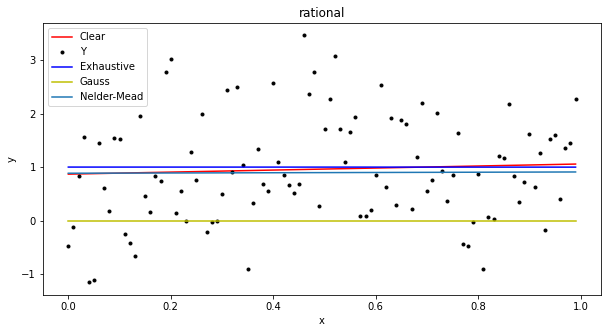

In [382]:
#x1 = numpy.linspace(1, min(x),max(x), endpoint=True)
y1 = parameters_rational[0][0] /(1+ x* parameters_rational[0][1] )   
y2= parameters_rational[1][0] / (1+ x* parameters_rational[1][1] )
y3=parameters_rational[2][0] /(1 + x* parameters_rational[2][1] )
plt.figure(figsize=(10,5))
plt.title("rational")
plt.plot(x, y_clear, 'r-')
plt.plot(x, y, '.k')
plt.plot(x, y1, 'b-')
plt.plot(x, y2, 'y-')
plt.plot(x, y3, '-')
#plt.legend(["Exhaustive", "Gauss"])
plt.legend(["Clear","Y","Exhaustive", "Gauss","Nelder-Mead"])
plt.xlabel("x")
plt.ylabel("y")